In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!mkdir ~/.kaggle
!echo '{"username":"yourusername","key":"yourkey"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

100% 219M/219M [00:13<00:00, 20.9MB/s]
100% 219M/219M [00:13<00:00, 17.0MB/s]


In [4]:
!unzip rice-image-dataset.zip -d /content/dataset

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karac

In [5]:
data_dir = '/content/dataset/Rice_Image_Dataset'

In [6]:
data_gen = ImageDataGenerator(
    rescale = 1/255,
    validation_split=0.2
    )

In [7]:
train_data = data_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True, 
    subset = 'training'
    )

Found 60000 images belonging to 5 classes.


In [8]:
test_data = data_gen.flow_from_directory(
    data_dir,
    target_size =(224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False,
    subset = 'validation'
    )

Found 15000 images belonging to 5 classes.


In [9]:
validation_data = data_gen.flow_from_directory(
    data_dir,
    target_size =(224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False,
    subset = 'validation'
    )

Found 15000 images belonging to 5 classes.


In [10]:
labels = train_data.class_indices
labels = [label for label, _ in labels.items()]

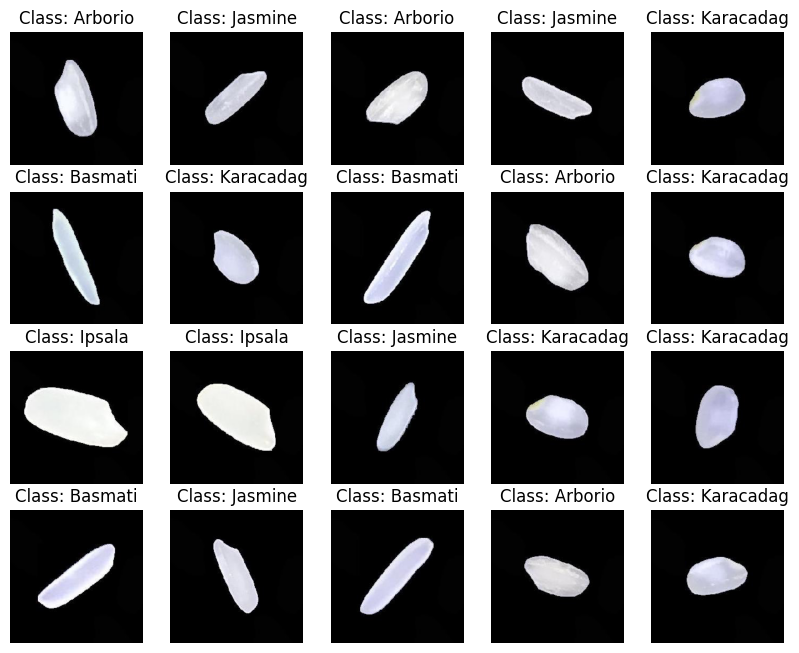

In [11]:
next_batch = train_data.next()
images = next_batch[0]
titles = next_batch[1]
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i], axis=0)]}')
    plt.axis("off")

In [12]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
model.compile(
    optimizer='sgd', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

In [15]:
history = model.fit(
    train_data, 
    epochs=5, 
    validation_data=test_data, 
    shuffle=True
    )

Epoch 1/5
1875/1875 [==============================] - 139s 69ms/step - loss: 0.2173 - accuracy: 0.9205 - val_loss: 0.0926 - val_accuracy: 0.9680
Epoch 2/5
1875/1875 [==============================] - 125s 66ms/step - loss: 0.1203 - accuracy: 0.9586 - val_loss: 0.0842 - val_accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1050 - accuracy: 0.9643 - val_loss: 0.0765 - val_accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0948 - accuracy: 0.9680 - val_loss: 0.0732 - val_accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0885 - accuracy: 0.9702 - val_loss: 0.0790 - val_accuracy: 0.9713


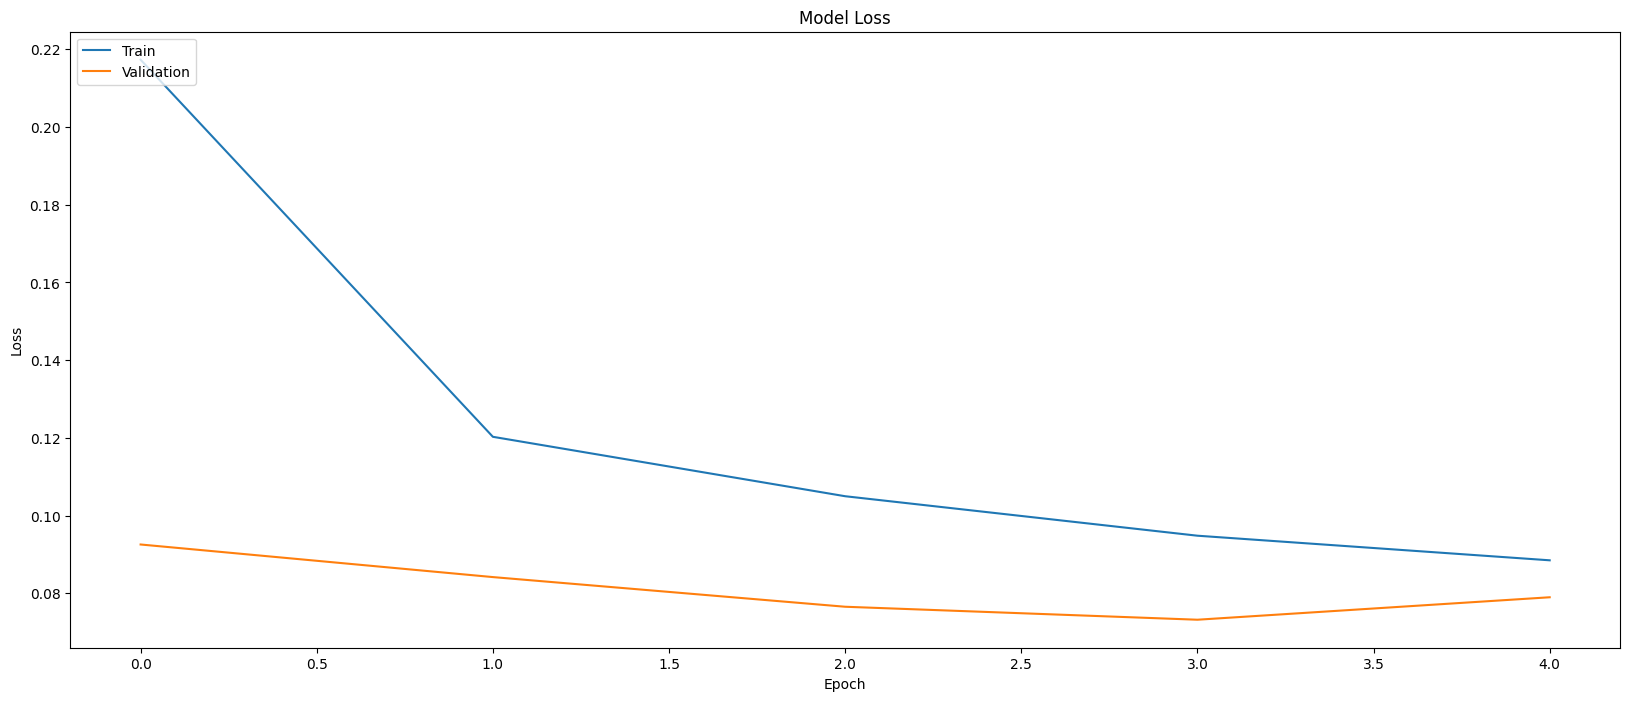

In [16]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

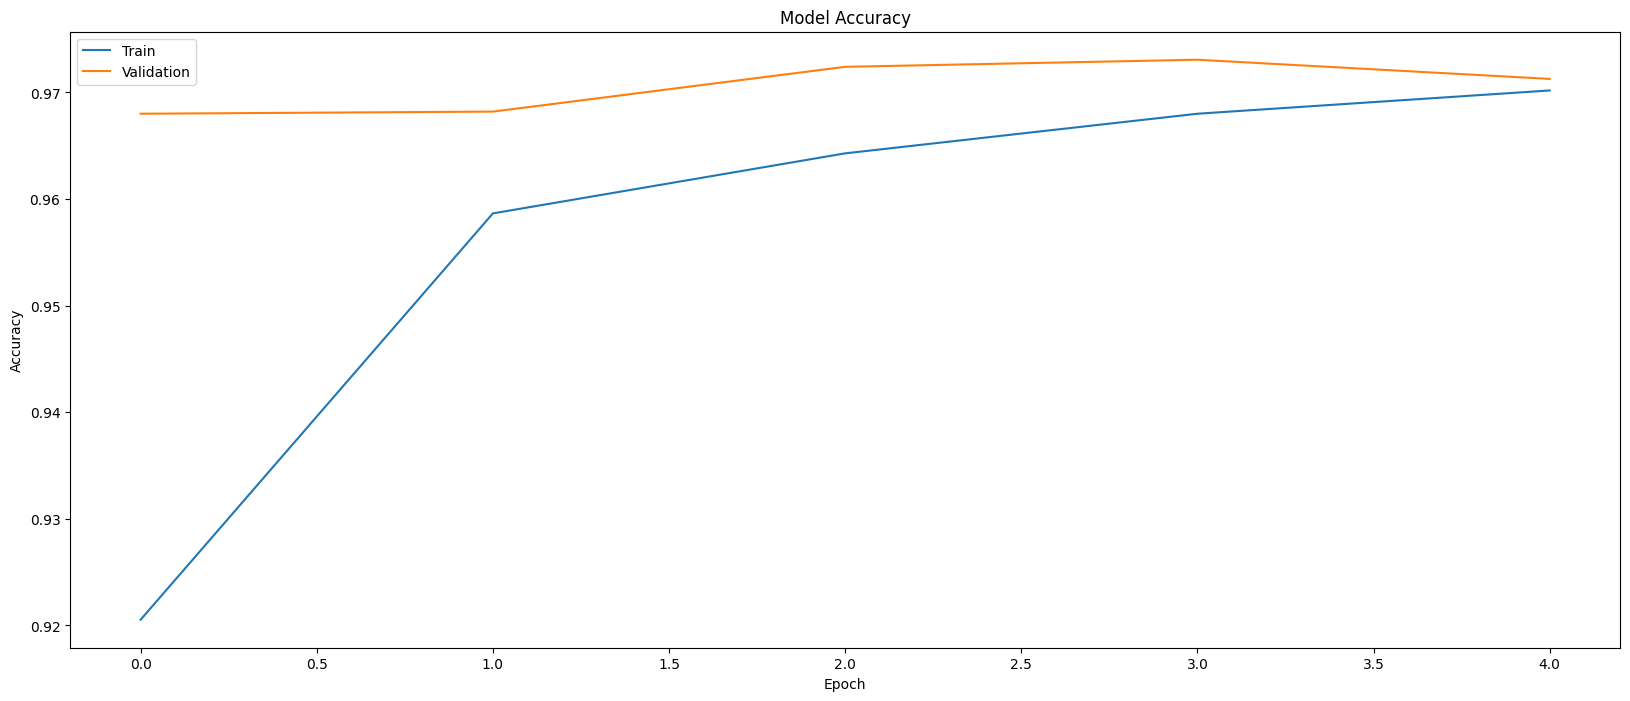

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
y_test = test_data.classes
y_pred = model.predict(test_data)
y_pred_int = np.argmax(y_pred, axis=1)

469/469 [==============================] - 25s 53ms/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_int, target_names=labels))

              precision    recall  f1-score   support

     Arborio       0.98      0.96      0.97      3000
     Basmati       0.94      0.99      0.96      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.98      0.93      0.96      3000
   Karacadag       0.96      0.98      0.97      3000

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



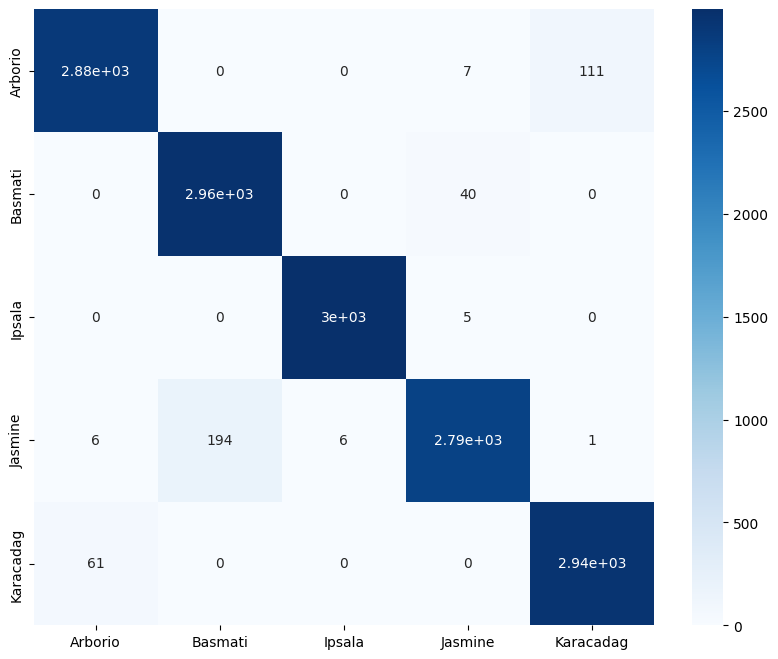

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_int), annot=True, fmt='.3g', xticklabels=labels,
            yticklabels=labels, cmap='Blues')
plt.show()

In [21]:
total_samples = len(train_data.labels) + len(validation_data.labels) + len(test_data.labels)
train_samples = len(train_data.labels)
validation_samples = len(validation_data.labels)
test_samples = len(test_data.labels)

In [22]:
train_percent = train_samples / total_samples * 100
validation_percent = validation_samples / total_samples * 100
test_percent = test_samples / total_samples * 100

In [23]:
split_labels = ['Train', 'Validation', 'Test']
split_sizes = [train_percent, validation_percent, test_percent]
split_colors = ['#ff9999', '#66b3ff', '#99ff99']

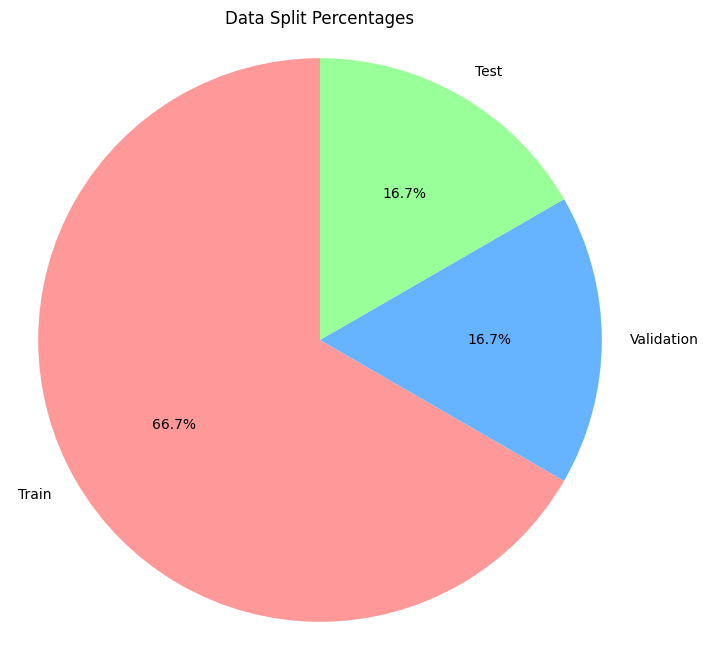

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(split_sizes, labels=split_labels, colors=split_colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Data Split Percentages')
plt.show()


In [25]:
y = confusion_matrix(y_test,y_pred_int)
print(y)

[[2882    0    0    7  111]
 [   0 2960    0   40    0]
 [   0    0 2995    5    0]
 [   6  194    6 2793    1]
 [  61    0    0    0 2939]]
